#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=cac64b8ed922a6f25ddc21a9b5ff3fe869b9889a9044506d085741d985f5d787
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


### Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data_Set.csv')
X = dataset.iloc[:, 6:].values 
y = dataset.iloc[:, 0].values
h_index = dataset.iloc[:, 1].values
g_index = dataset.iloc[:, 2].values
num_papers = dataset.iloc[:, 3].values
total_citation = dataset.iloc[:, 4].values
highest_citation = dataset.iloc[:, 5].values

In [ ]:
print(X)

[[ 2837  1105  1014 ...    -1    -1    -1]
 [12172  9582  8043 ...     0     0     0]
 [  116   103    58 ...    -1    -1    -1]
 ...
 [ 3208  1744  1281 ...     3     3     1]
 [ 2125  1861  1791 ...     3     2     1]
 [  333   297   266 ...     0     0     0]]


## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [ ]:
print(X)

[[0.10033064 0.06133004 0.07140821 ... 0.         0.         0.        ]
 [0.43221815 0.53786048 0.57233466 ... 0.11111111 0.125      0.125     ]
 [0.00359086 0.00500309 0.00327822 ... 0.         0.         0.        ]
 ...
 [0.11352082 0.09725111 0.09043615 ... 0.44444444 0.5        0.25      ]
 [0.07501689 0.10382821 0.12678164 ... 0.44444444 0.375      0.25      ]
 [0.01130586 0.01590871 0.01810148 ... 0.11111111 0.125      0.125     ]]


##Training the SOM


In [ ]:
xy = 2

In [ ]:
from minisom import MiniSom
som = MiniSom(x=xy, y=xy, input_len= 1000, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 5000)

In [ ]:
som_out = []
for i, x in enumerate(X):
    w = som.winner(x)
    som_out.append(list(w))

In [ ]:
som_out = np.array(som_out)

In [ ]:
r_name = {}
r_h_index = {}
r_g_index = {}
r_np = {}
r_ttl_cit = {}
r_h_cit = {}
l = []
for i, x in enumerate(som_out):
  key = str(x[0]) + '_' + str(x[1])
  if key in r_name:
    l = r_name.get(key)
    l.append(y[i])
    r_name[key] = l
  else:
    l = [] 
    l.append(y[i])
    r_name[key] = l 
  if key in r_h_index:
    l = r_h_index.get(key)
    l.append(h_index[i])
    r_h_index[key] = l
  else:
    l = [] 
    l.append(h_index[i])
    r_h_index[key] = l 
  if key in r_g_index:
    l = r_g_index.get(key)
    l.append(g_index[i])
    r_g_index[key] = l
  else:
    l = [] 
    l.append(g_index[i])
    r_g_index[key] = l 
  if key in r_np:
    l = r_np.get(key)
    l.append(num_papers[i])
    r_np[key] = l
  else:
    l = [] 
    l.append(num_papers[i])
    r_np[key] = l 
  if key in r_ttl_cit:
    l = r_ttl_cit.get(key)
    l.append(total_citation[i])
    r_ttl_cit[key] = l
  else:
    l = [] 
    l.append(total_citation[i])
    r_ttl_cit[key] = l 
  if key in r_h_cit:
    l = r_h_cit.get(key)
    l.append(highest_citation[i])
    r_h_cit[key] = l
  else:
    l = [] 
    l.append(highest_citation[i])
    r_h_cit[key] = l 


In [ ]:
print(len(r_name.keys()))

4


In [ ]:
avrg_hindex = {}
for k, v in r_h_index.items():
  avrg_hindex[k] = float("{:.1f}".format(sum(v)/ float(len(v))))
avrg_np = {}
for k, v in r_np.items():
  avrg_np[k] = float("{:.1f}".format(sum(v)/ float(len(v))))
avrg_highest = {}
for k, v in r_h_cit.items():
  avrg_highest[k] = float("{:.1f}".format(sum(v)/ float(len(v))))
avrg_total = {}
for k, v in r_ttl_cit.items():
  avrg_total[k] = float("{:.1f}".format(sum(v)/ float(len(v))))

In [ ]:
x = np.arange(xy)
y = np.arange(xy)

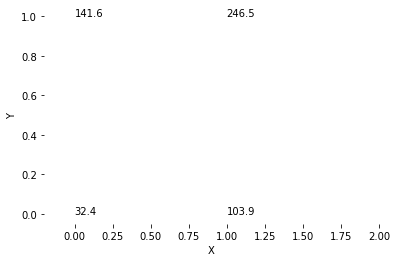

In [ ]:
fig, ax = plt.subplots()
for k , v in avrg_hindex.items():
  i = int(k.split('_')[0])
  j = int(k.split('_')[1])
  ax.annotate(v, (i, j))
ax.plot(x, y, 'w')
#ax.plot(h_sumRed, A_Red, 'r+', label = 'Wrong Approximation')
plt.box(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.2,2)
plt.savefig('avrg_hIndex'+str(xy**2)+'.pdf')
plt.show()

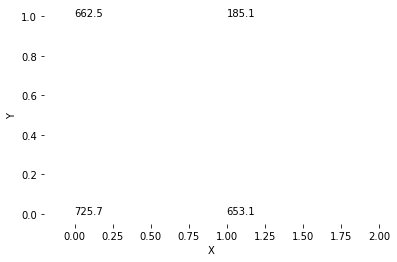

In [ ]:
fig, ax = plt.subplots()
for k , v in avrg_np.items():
  i = int(k.split('_')[0])
  j = int(k.split('_')[1])
  ax.annotate(v, (i, j))
ax.plot(x, y, 'w')
#ax.plot(h_sumRed, A_Red, 'r+', label = 'Wrong Approximation')
plt.box(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.2,2)
plt.savefig('avrg_np'+str(xy**2)+'.pdf')
plt.show()

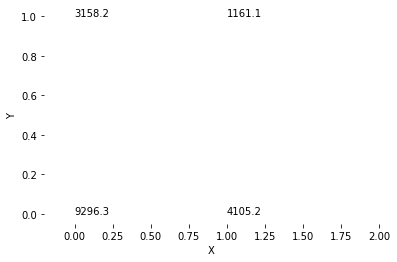

In [ ]:
fig, ax = plt.subplots()
for k , v in avrg_highest.items():
  i = int(k.split('_')[0])
  j = int(k.split('_')[1])
  ax.annotate(v, (i, j))
ax.plot(x, y, 'w')
#ax.plot(h_sumRed, A_Red, 'r+', label = 'Wrong Approximation')
plt.box(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.2,2)
plt.savefig('avrg_highest'+str(xy**2)+'.pdf')
plt.show()

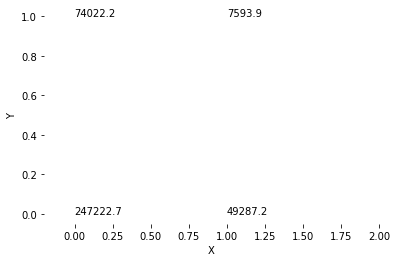

In [ ]:
fig, ax = plt.subplots()
for k , v in avrg_total.items():
  i = int(k.split('_')[0])
  j = int(k.split('_')[1])
  ax.annotate(v, (i, j))
ax.plot(x, y, 'w')
#ax.plot(h_sumRed, A_Red, 'r+', label = 'Wrong Approximation')
plt.box(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.2,2)
plt.savefig('avrg_total'+str(xy**2)+'.pdf')
plt.show()

In [ ]:
print(tabulate(r_h_index, headers = 'keys'))
with open('h_index_'+str(xy**2)+'.txt', 'w') as f:
  f.write(tabulate(r_h_index, headers = 'keys'))
with open('g_index_'+str(xy**2)+'.txt', 'w') as f:
  f.write(tabulate(r_g_index, headers = 'keys'))
with open('names_'+str(xy**2)+'.txt', 'w') as f:
  f.write(tabulate(r_name, headers = 'keys'))
with open('numPapers_'+str(xy**2)+'.txt', 'w') as f:
  f.write(tabulate(r_np, headers = 'keys'))
with open('totalCit_'+str(xy**2)+'.txt', 'w') as f:
  f.write(tabulate(r_ttl_cit, headers = 'keys'))
with open('highestCit_'+str(xy**2)+'.txt', 'w') as f:
  f.write(tabulate(r_h_cit, headers = 'keys'))

  1_0    0_0    1_1    0_1
-----  -----  -----  -----
  104    281     14    148
  118    285     16    116
  116    236     37    127
  102    224     59    152
  135    251     24
   98    262      7
  108    255     33
  122    294     33
  103    233     12
   94    288     39
  119    242     74
   94    178     13
  114    279     83
   78    215     27
   94    243     28
  111    225     47
   92    260     25
   97    236     18
  102    207     50
  111    236     19
  102    165     11
  114            18
   95            30
  125            46
   82            23
   94            68
   97            29
   97             9
   97            17
  111            18
  114            79
  121            61
  105            73
  120            19
  111            35
   84            25
  124            80
   99            32
  120            21
  119            11
   67            77
   98            21
   87            27
   76            20
  114            51
  137            2

In [ ]:
df = pd.DataFrame([r_name])
df1 = pd.DataFrame([r_h_index])
df2 = pd.DataFrame([r_g_index])
df.to_csv('name_'+str(xy**2)+'.csv', mode = 'w', index = False)
df1.to_csv('h_index_'+str(xy**2)+'.csv', mode = 'w', index = False)
df2.to_csv('g_index_'+str(xy**2)+'.csv', mode = 'w', index = False)

In [ ]:
print(df1)

                         1_2              5_0  ...         6_2         6_3
0  [104, 102, 111, 106, 101]  [281, 285, 279]  ...  [236, 207]  [152, 165]

[1 rows x 45 columns]
